In [3]:
cd ..

C:\Users\Sommer Lab\Documents\Analysis Code


In [36]:
from ImageAnalysis import ImageAnalysisCode
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import pandas as pd
import os
from scipy import ndimage

In [37]:
####################################
#Set the date and the folder name
####################################
dataRootFolder =r"D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data"
date = '3/22/2024'

ODTfolder = 'Andor/ODT 1900'
MOTfolder = 'Andor/MOT 1900'

####################################
#Parameter Setting
####################################
repetition = 3 #The number of identical runs to be averaged.
subtract_burntin = 0
examNum = None #The number of runs to exam.
examFrom = None #Set to None if you want to check the last several runs. 
plotPWindow = 5
intermediatePlot = True
uniformscale = 0
rcParams = {'font.size': 10, 'xtick.labelsize': 9, 'ytick.labelsize': 9}
plt.rcParams['image.cmap'] = 'jet'

variablesToDisplay = [
                    # 'Coil_medB', 
                       # 'ODT Misalign', 
                        'wait',
                       # 'ODT Position',
                      'ZSBiasCurrent',
                      'VerticalBiasCurrent',
                        # 'IterationNum',
                       # 'CamBiasCurrent'
                      ]
showTimestamp = False
# variablesToDisplay=None
textY = 1
textVA = 'bottom'

variableFilterList = None
variableFilterList = [
    # 'wait==50', 
    ] # NO SPACE around the operator!

pictureToHide = None
# pictureToHide = [0,1,2,3] 
# pictureToHide = list(range(0,10,2))

subtract_bg = 0
signal_feature = 'narrow' 
signal_width = 10 #The narrower the signal, the bigger the number.
fitbgDeg = 5
rotateAngle= 0.5 #rotates ccw

####################################
####################################
dayfolder = ImageAnalysisCode.GetDataLocation(date, DataPath=dataRootFolder)
ODTdataPath = os.path.join(dayfolder, ODTfolder)
MOTdataPath = os.path.join(dayfolder, MOTfolder)

examFrom, examUntil = ImageAnalysisCode.GetExamRange(examNum, examFrom, repetition)
params = ImageAnalysisCode.ExperimentParams(date, t_exp = 10e-6, picturesPerIteration=None, cam_type = "zyla")

In [38]:
rowstart = 10
rowend = -10
columnstart = 10
columnend = -10

columnstart = 750
columnend = 1200

# rowstart =750 #ODT 2675
# rowend = 830
# # rowstart =616 #ODT1675
# # rowend = 651
rowstart =570 #ODT1900
rowend = 670
# # rowstart = 800 #ODT990
# # rowend = 835

# rowstart = 888 #ODT700
# rowend = 923
# rowstart = 1032 #ODT400
# rowend = 1068

# rowstart = 543 #ODT3400
# rowend = 578

rowstart -= 150
rowend += 50

ODTcrop = ODT[:, rowstart:rowend, columnstart:columnend]
MOTcrop = MOT[:, rowstart:rowend, columnstart:columnend]

NameError: name 'ODT' is not defined

In [40]:
GM1900 = r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\03-2024\22 Mar 2024\Andor\GM Cloud 1900 at 0 wait'
GM400 = r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\03-2024\25 Mar 2024\Andor\GM Cloud 400 at 0 wait'
GM3400 = r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\03-2024\25 Mar 2024\Andor\GM Cloud 3400 at 0 wait'

ODT1900 = r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\03-2024\25 Mar 2024\Andor\ODT 1900 at wait 500'
ODT400 = r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\03-2024\25 Mar 2024\Andor\ODT 400 at wait 500'
ODT3400 = r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\03-2024\25 Mar 2024\Andor\ODT 3400 at wait 500'

GMimgs, GMlog = ImageAnalysisCode.PreprocessZylaImg(GM400, GM1900, GM3400, subtract_burntin=1, rotateAngle=rotateAngle)
# GMlog, GMimgs = ImageAnalysisCode.DataFilter(GMlog, filterLists = [['IterationNum>0']], imgs = GMimgs)

subtract burntin	 1
picture/iteration	 4
first frame			 0
Loading pictures: |||
Finish loading pictures, 96 raw images loaded.
Finigh calculating columnDensities.

ColumnDensities rotated.



In [75]:
ODTimgs, ODTlog = ImageAnalysisCode.PreprocessZylaImg(ODT400, ODT1900, ODT3400, examRange=[-8, -5], 
                                                      subtract_burntin=0, rotateAngle=rotateAngle,
                                                     rowstart=50, rowend=750, columnstart=500, columnend=1500)

subtract burntin	 0
picture/iteration	 3
first frame			 0
Loading pictures: |
Finish loading pictures, 9 raw images loaded.
Finigh calculating columnDensities.

ColumnDensities rotated.



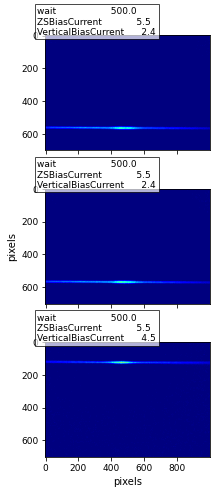

In [76]:
ImageAnalysisCode.plotImgAndFitResult(ODTimgs, popts=[], variableLog=ODTlog, 
                                      variablesToDisplay=variablesToDisplay, title=' ', 
                                      plotPWindow=3, figSizeRate=1.5, fontSizeRate=1.8, textLocationY=0.99)

In [77]:
def DetectPeak2D(img, sigma=10, thr=0.9):
    
    imgFlted = ndimage.gaussian_filter(img, sigma=sigma)
    diff = img - imgFlted
    
    diff[ diff < (thr * diff.max()) ] = 0
    return ndimage.center_of_mass(diff), imgFlted
    

In [82]:
imgs = ODTimgs.copy()

maxCoor = []
imgFiltered = np.zeros_like(imgs)

for ii, img in enumerate(imgs):
    coor, imgFiltered[ii] = DetectPeak2D(img, sigma=10)
    maxCoor.append( coor )
    # maxCoor.append( np.unravel_index(imgFiltered[ii].argmax(), img.shape) )

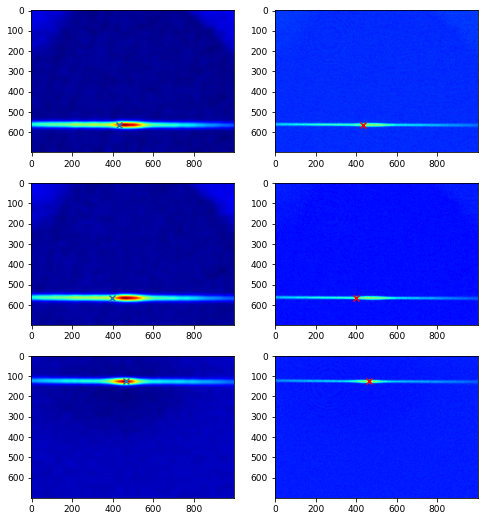

In [83]:
fig, axes = plt.subplots(3,2, figsize=(8,9))
for ii, ax in enumerate(axes):
    ax[0].imshow(imgFiltered[ii])
    ax[0].scatter(*maxCoor[ii][::-1], marker='x')
    
    ax[1].imshow(imgs[ii])
    ax[1].scatter(*maxCoor[ii][::-1], marker='x', c='r')

In [80]:
imgs = ODTimgs.copy()

maxCoor = []
imgFiltered = np.zeros_like(imgs)
for ii, img in enumerate(imgs):
    imgFiltered[ii] = ndimage.gaussian_filter(img, sigma=10)
    thr = 0.9*(imgFiltered[ii].max() - imgFiltered[ii].min()) + imgFiltered.min()
    img[ imgFiltered[ii] < thr ] = 0
    maxCoor.append( np.array(ndimage.center_of_mass(img)) )
    # maxCoor.append( np.unravel_index(imgFiltered[ii].argmax(), img.shape) )

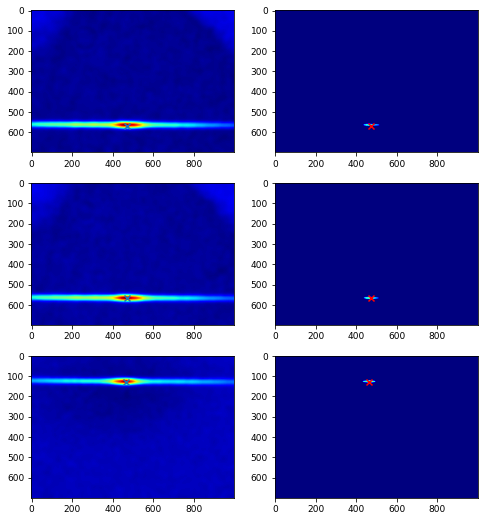

In [81]:
fig, axes = plt.subplots(3,2, figsize=(8,9))
for ii, ax in enumerate(axes):
    ax[0].imshow(imgFiltered[ii])
    ax[0].scatter(*maxCoor[ii][::-1], marker='x')
    
    ax[1].imshow(imgs[ii])
    ax[1].scatter(*maxCoor[ii][::-1], marker='x', c='r')


In [32]:
df = ODTlog[['ODT_Position']]
df['maxCoor'] = maxCoor

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
df

,ODT_Position,maxCoor
time,,
2024-03-25 19:29:27.141630,400.0,"[1067.1347527665002, 970.7107199624993]"
2024-03-25 19:29:34.439259,400.0,"[1066.9187214664087, 976.8205319238732]"
2024-03-25 19:29:41.703938,400.0,"[1066.6165118311624, 974.5542148467366]"
2024-03-25 19:29:48.980102,400.0,"[1066.7148676886109, 973.1590794587867]"
2024-03-25 19:29:56.222314,400.0,"[1067.061520041872, 978.3995399695366]"
2024-03-25 19:30:03.496587,400.0,"[1066.8798971893043, 964.7343224923003]"
2024-03-25 19:16:44.982953,1900.0,"[616.48755718771, 977.158425996637]"
2024-03-25 19:16:52.342318,1900.0,"[616.8690179755666, 973.3976269061341]"
2024-03-25 19:17:00.340198,1900.0,"[616.7807575652726, 976.8576402434131]"


In [42]:
df.groupby('ODT_Position').mean()

,maxCoor
ODT_Position,
400.0,"[1066.8877118306434, 973.0630681089556]"
1900.0,"[616.7201241903618, 973.7233045454191]"
3400.0,"[179.4187802253326, 968.1868582135995]"


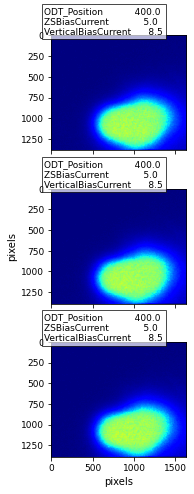

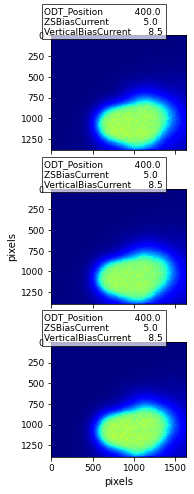

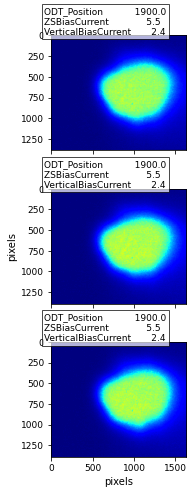

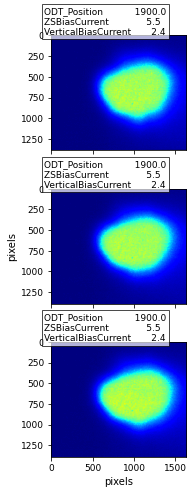

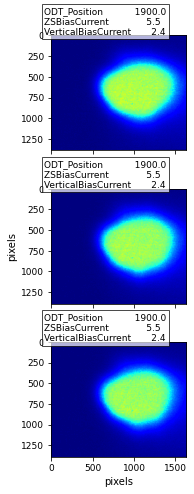

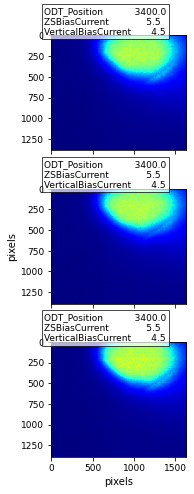

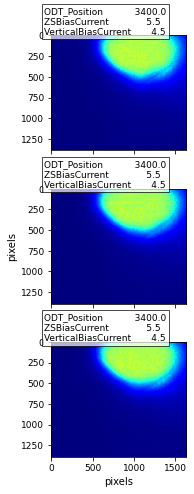

In [16]:
ImageAnalysisCode.plotImgAndFitResult(GMimgs, variableLog=GMlog, 
                                      variablesToDisplay=variablesToDisplay, title=' ', 
                                      plotPWindow=3, figSizeRate=1.5, fontSizeRate=1.8, textLocationY=0.99)

In [ ]:
# %%
imgs = ODTcolumnDensities.copy()

maxCoor = []
imgFiltered = np.zeros_like(imgs)
for ii, img in enumerate(imgs):
    imgFiltered[ii] = ndimage.gaussian_filter(img, sigma=10)
    thr = 0.9*(imgFiltered[ii].max() - imgFiltered[ii].min()) + imgFiltered.min()
    img[ imgFiltered[ii] < thr ] = 0
    maxCoor.append( ndimage.center_of_mass(img) )
    # maxCoor.append( np.unravel_index(imgFiltered[ii].argmax(), img.shape) )    
    
fig, axes = plt.subplots(5,2, figsize=(20,15), sharex=True, sharey=True, layout='constrained')
for ii, ax in enumerate(axes):
    ax[0].imshow(ODTcolumnDensities[ii])
    ax[0].scatter(*maxCoor[ii][::-1], marker='x')
    
    ax[1].imshow(imgs[ii])
    ax[1].scatter(*maxCoor[ii][::-1], marker='x', c='r')




In [43]:
df

,ODT_Position,maxCoor
time,,
2024-03-25 19:29:27.141630,400.0,"[1067.1347527665002, 970.7107199624993]"
2024-03-25 19:29:34.439259,400.0,"[1066.9187214664087, 976.8205319238732]"
2024-03-25 19:29:41.703938,400.0,"[1066.6165118311624, 974.5542148467366]"
2024-03-25 19:29:48.980102,400.0,"[1066.7148676886109, 973.1590794587867]"
2024-03-25 19:29:56.222314,400.0,"[1067.061520041872, 978.3995399695366]"
2024-03-25 19:30:03.496587,400.0,"[1066.8798971893043, 964.7343224923003]"
2024-03-25 19:16:44.982953,1900.0,"[616.48755718771, 977.158425996637]"
2024-03-25 19:16:52.342318,1900.0,"[616.8690179755666, 973.3976269061341]"
2024-03-25 19:17:00.340198,1900.0,"[616.7807575652726, 976.8576402434131]"


In [ ]:
ODTcrop = ODT[:, rowstart:rowend, columnstart:columnend]
MOTcrop = MOT[:, rowstart:rowend, columnstart:columnend]

In [57]:
def CropImages(imgs, centers, halfX=220, halfY=30):
    if len(centers) == 1:
        centerX, centerY = int(centers[0][1]), int(centers[0][0])
        xmin, xmax = centerX - halfX, centerX + halfX
        ymin, ymax = centerY - halfY, centerY + halfY
        return imgs[:, ymin: ymax, xmin: xmax]
        
    elif len(centers) > 1:
        cropped = []
        for ii, img in enumerate(imgs):
            centerX, centerY = int(centers[ii][1]), int(centers[ii][0])
            xmin, xmax = centerX - halfX, centerX + halfX
            ymin, ymax = centerY - halfY, centerY + halfY
    
            cropped.append( img[ymin: ymax, xmin: xmax] )
        return np.array(cropped)
    

In [63]:
croppedODTimgs = CropImages(ODTimgs, df.maxCoor)

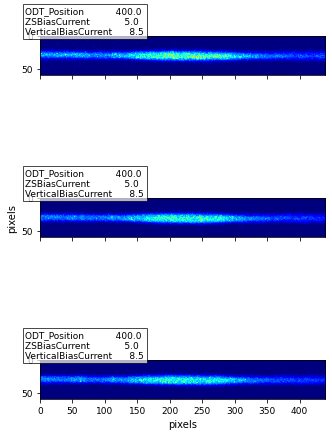

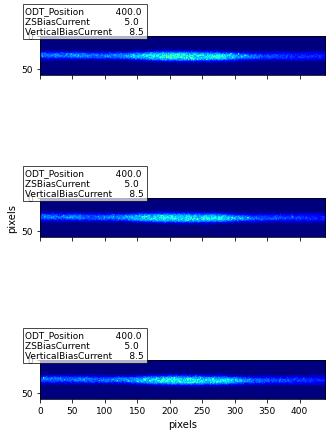

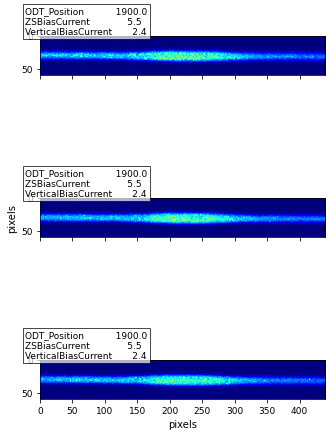

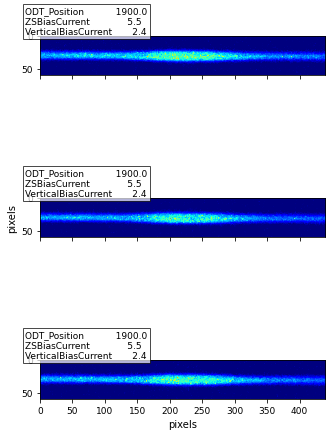

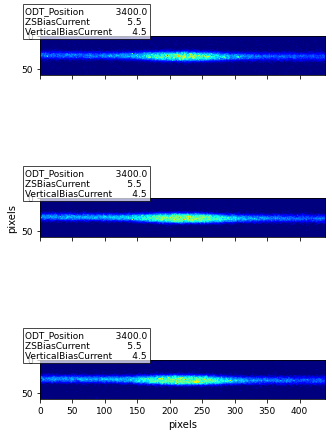

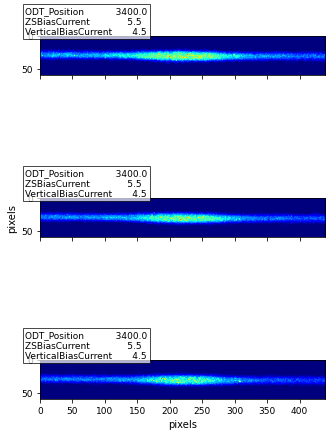

In [64]:
ImageAnalysisCode.plotImgAndFitResult(croppedODTimgs, variableLog=ODTlog, 
                                      variablesToDisplay=variablesToDisplay, title=' ', 
                                      plotPWindow=3, figSizeRate=1.5, fontSizeRate=1.8, textLocationY=0.99)

In [69]:
params = ImageAnalysisCode.ExperimentParams('3/21/2024', t_exp = 10e-6, picturesPerIteration=3, cam_type = "zyla")
dx = params.camera.pixelsize_microns/params.magnification #The length in micron that 1 pixel correspond to. 
YcolumnDensities = croppedODTimgs.sum(axis=2) * dx / 1e6**2

popts = []
bgs = []
for ydata in YcolumnDensities:
    popt, bg = ImageAnalysisCode.fitMultiGaussian(ydata, dx=dx, 
                                                  subtract_bg=subtract_bg, signal_feature=signal_feature, 
                                                  fitbgDeg=3, amp=1, width=3, denoise=0)
    popts.append(popt)
    bgs.append(bg)
    
results = ImageAnalysisCode.AnalyseFittingResults(popts, logTime=ODTlog.index)
results = results.join(df)



	New side imaging


In [81]:
results

,Ycenter,Ywidth,YatomNumber,ODT_Position,maxCoor
time,,,,,
2024-03-25 19:29:27.141630,114.519288,17.973910,613585.179360,400.0,"[1067.1347527665002, 970.7107199624993]"
2024-03-25 19:29:34.439259,117.422073,18.795601,554725.192967,400.0,"[1066.9187214664087, 976.8205319238732]"
2024-03-25 19:29:41.703938,116.288441,18.655007,570639.483381,400.0,"[1066.6165118311624, 974.5542148467366]"
2024-03-25 19:29:48.980102,116.686094,18.342908,542828.083459,400.0,"[1066.7148676886109, 973.1590794587867]"
2024-03-25 19:29:56.222314,114.228552,18.585234,538316.893622,400.0,"[1067.061520041872, 978.3995399695366]"
2024-03-25 19:30:03.496587,116.933577,18.215312,545081.398562,400.0,"[1066.8798971893043, 964.7343224923003]"
2024-03-25 19:16:44.982953,116.411627,18.829270,832796.736908,1900.0,"[616.48755718771, 977.158425996637]"
2024-03-25 19:16:52.342318,117.788788,19.127424,728850.667176,1900.0,"[616.8690179755666, 973.3976269061341]"
2024-03-25 19:17:00.340198,117.426160,18.993708,723713.143868,1900.0,"[616.7807575652726, 976.8576402434131]"


In [80]:
results.groupby('ODT_Position').mean()

,Ycenter,Ywidth,YatomNumber
ODT_Position,,,
400.0,116.013004,18.427996,560862.705225
1900.0,116.623176,19.025540,752787.883752
3400.0,116.112037,17.948801,557499.452354


In [88]:
ODTCoords = df.groupby('ODT_Position').mean()
ODTCoords

,maxCoor
ODT_Position,
400.0,"[1066.8877118306434, 973.0630681089556]"
1900.0,"[616.7201241903618, 973.7233045454191]"
3400.0,"[179.4187802253326, 968.1868582135995]"


In [77]:
GMimgs.mean(axis=0).shape

(1390, 1634)

In [100]:
ODTs = [400, 1900, 3400]
halfX = 20
halfY = 20

GMDensityatODT = []
for o in ODTs:
    _, imgs = ImageAnalysisCode.DataFilter(GMlog, ['ODT_Position=={}'.format(o)], imgs = GMimgs)
    
    centerX, centerY = int(ODTCoords.loc[o][0][1]), int(ODTCoords.loc[o][0][0])
    
    xmin, xmax = centerX - halfX, centerX + halfX
    ymin, ymax = centerY - halfY, centerY + halfY
    
    GMDensityatODT.append( imgs[:, ymin:ymax, xmin:xmax].mean() )


In [101]:
GMDensityatODT

[17728974034012.39, 18723146536300.39, 18629936218319.39]

In [98]:
ODTCoords.loc[400][0][0]

1066.8877118306434

In [102]:
results = results.groupby('ODT_Position').mean().join(ODTCoords)
results['GMDensity'] = GMDensityatODT
results

,Ycenter,Ywidth,YatomNumber,maxCoor,GMDensity
ODT_Position,,,,,
400.0,116.013004,18.427996,560862.705225,"[1066.8877118306434, 973.0630681089556]",1.772897e+13
1900.0,116.623176,19.025540,752787.883752,"[616.7201241903618, 973.7233045454191]",1.872315e+13
3400.0,116.112037,17.948801,557499.452354,"[179.4187802253326, 968.1868582135995]",1.862994e+13


In [106]:
results = results.drop('maxCoor', axis=1)
results['ratio'] = results.YatomNumber / results.GMDensity

In [108]:
results[['YatomNumber', 'GMDensity', 'ratio']]

,YatomNumber,GMDensity,ratio
ODT_Position,,,
400.0,560862.705225,1.772897e+13,3.163537e-08
1900.0,752787.883752,1.872315e+13,4.020627e-08
3400.0,557499.452354,1.862994e+13,2.992493e-08
